In [1]:
import  dataloaders
import  pickle
import  numpy                   as      np
import  matplotlib.pyplot       as      plt
from    mpl_toolkits.mplot3d    import  Axes3D
from    matplotlib.animation    import  FuncAnimation
from    tqdm                    import  tqdm

In [2]:
def runge_kutta_solve(delta, alpha, beta, gamma, omega, x0, v0, t_span, dt, poincare_period,_ret_all=None):
    t_eval = np.arange(t_span[0], t_span[1] + dt, dt)
    n_steps = len(t_eval)

    x = np.zeros(n_steps)
    v = np.zeros(n_steps)

    x[0] = x0
    v[0] = v0

    poincare_points = []
    poincare_points.append([x0, v0])
    for i in (range(1, n_steps)):
        t = t_eval[i - 1]
        y = np.array([x[i - 1], v[i - 1]])
        x[i], v[i] = dataloaders.runge_kutta_step(t, y, dt, delta, alpha, beta, gamma, omega)

        # Check if the oscillator crosses the Poincaré section (v = 0)
        # if v[i-1] * v[i] < 0:
            # Interpolate to find the exact intersection point
            # t_interpolate = t_eval[i-1] + dt * (0 - v[i-1]) / (v[i] - v[i-1])
            # x_interpolate = x[i-1] + (x[i] - x[i-1]) * (t_interpolate - t_eval[i-1]) / dt
            # poincare_points.append([x_interpolate, v[i]])
        if _ret_all:
            pass #poincare_points.append([x[i], v[i]])
        elif (i*dt)%int(poincare_period)==0:
            poincare_points.append([x[i], v[i]])
    if _ret_all:
        return np.row_stack([x,v])
    return np.array(poincare_points)


In [3]:
# Parameters
δ = 0.3    # Damping coefficient
α = -1.0    # Linear stiffness coefficient
β = 1   # Non-linear stiffness coefficient
ω = 1.2    # Angular frequency of the external driving force

γ = 0.5    # Amplitude of the external driving force
# Period of the Poincaré section (e.g., time period to reach v=0)
poincare_period = 2 * np.pi / ω


In [4]:
Framess = 600
points  = 800
dt = 0.01
t_span = (0, Framess)

All = True
for gamma in reversed([0.37]):
    γ = gamma
    print(γ)
    
    mapss = []
    for index in tqdm(range(points)):
        # Initial conditions
        x0 = np.random.random(size=[1])[0]*4-2
        v0 = np.random.random(size=[1])[0]*4-2
        mapss.append(runge_kutta_solve(δ, α, β, γ, ω, x0, v0, t_span, dt, poincare_period,All))
        
    with open(f'Frames={Framess} {points=} {All=} gamma={γ} omega={ω} beta={β} alpha={α} delta={δ}.pkl', 'wb') as file:
        pickle.dump(mapss, file)


0.37


100%|██████████| 800/800 [25:39<00:00,  1.92s/it]


In [10]:
len(mapss)

800

In [5]:
# import pickle

# # Load the list from the file
# with open('list_data.pkl', 'rb') as file:
#     loaded_list = pickle.load(file)


In [6]:
# # # Calculate the Poincaré map
# # poincare_points = runge_kutta_solve(δ, α, β, γ, ω, x0, v0, t_span, dt, poincare_period)

# for indes in range(mapss[0].shape[0]):
#     # Plot the Poincaré map
#     plt.figure(figsize=(8, 6))
#     for map in mapss:
#         plt.scatter(map[indes,0], map[indes,1], s=5)

#     plt.xlabel("Displacement (x)")
#     plt.ylabel("Velocity (v)")
#     plt.title("Poincaré Map of the Duffing Oscillator")
#     plt.grid(True)
#     plt.savefig(f'f{indes}.png')
#     plt.show()
#     # break


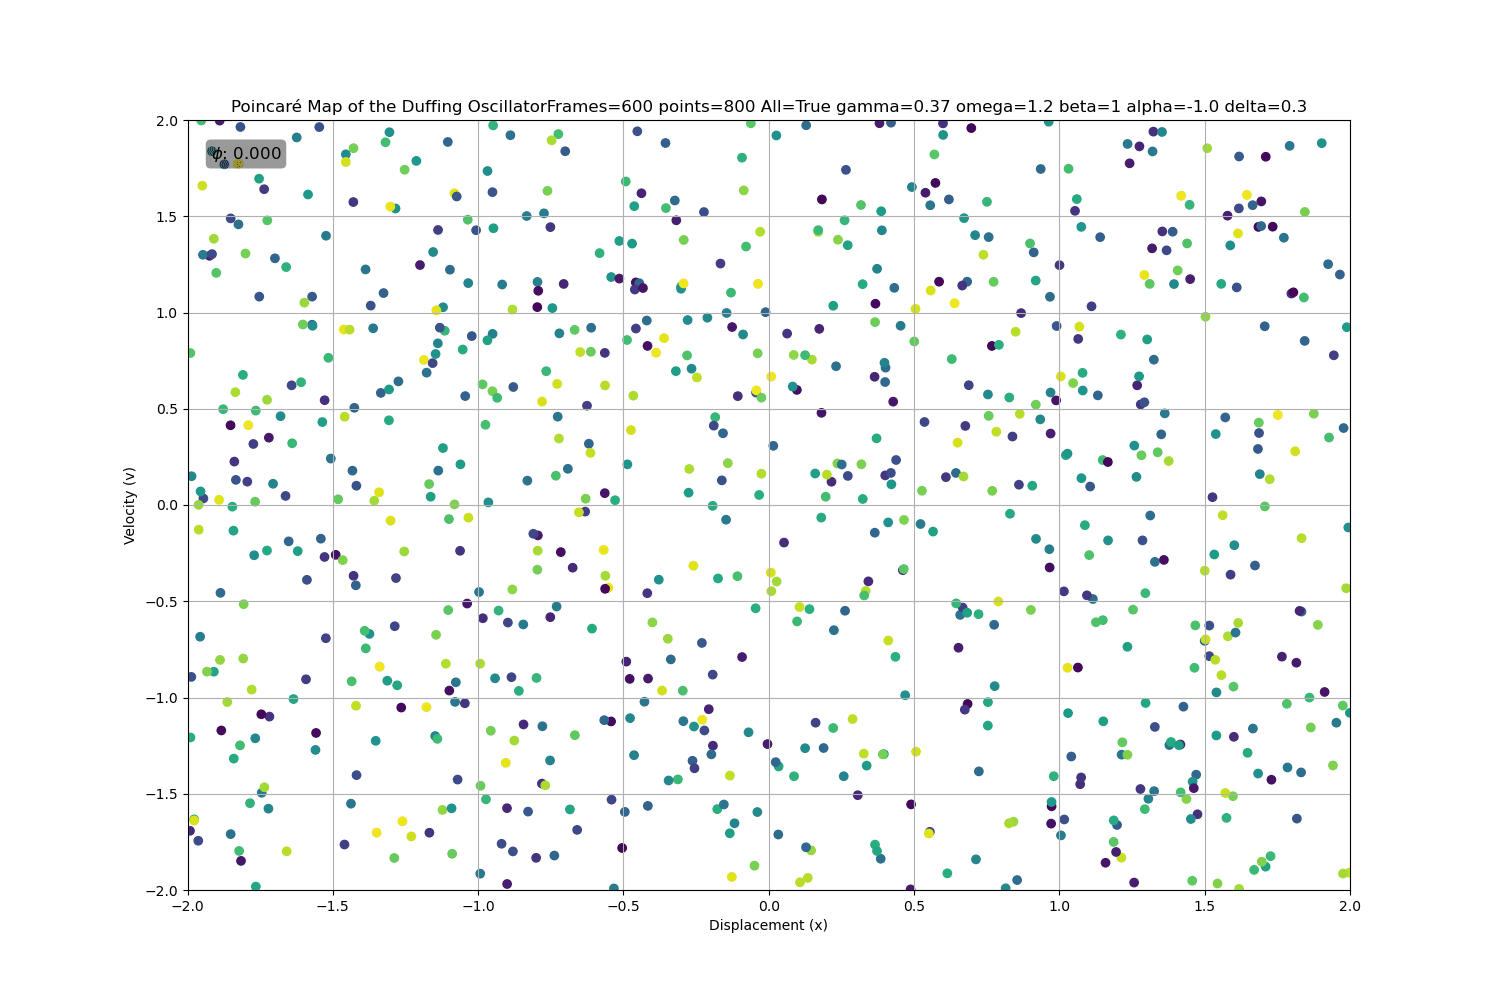

In [1]:
from IPython.display import Image, display
display(Image(filename='results/Poncare section/Poincaré Map of the Duffing OscillatorFrames=600 points=800 All=True gamma=0.37 omega=1.2 beta=1 alpha=-1.0 delta=0.3.gif'))
